In [1]:
import sys
sys.path.insert(0, 'src')
from read_genome import *

def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

In [2]:
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t


In [3]:
def naiveWithRC(p,t):
    occ = naive(p, t)
    p_rc = reverseComplement(p)
    if p != p_rc:
        occ.extend(naive(p_rc,t))
    return occ

In [4]:
!wget --no-check -P resources/ https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa


--2024-10-24 10:44:16--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 143.204.154.95, 143.204.154.225, 143.204.154.101, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|143.204.154.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘resources/lambda_virus.fa.1’

lambda_virus.fa.1   100%[===================>]  48.12K   303KB/s    in 0.2s    

2024-10-24 10:44:17 (303 KB/s) - ‘resources/lambda_virus.fa.1’ saved [49270/49270]



In [5]:
genome = readFasta("resources/lambda_virus.fa")

Q1 How many times does AGGT or its reverse complement (ACCT) occur in the lambda virus genome?
E.g. if AGGT occurs 10 times and ACCT occurs 12 times, you should report 22.

In [6]:
len(naive('AGGT', genome)) + len(naive('ACCT', genome))

306

Q2 How many times does TTAA or its reverse complement occur in the labda virus genome?
Hint: TTAA and its reverse complement are equal, so remember to not double count

In [7]:
len(naive('TTAA', genome))

195

Q3 What is the offset of the leftmost occurrence of ACTAAGT or its reverse complement
in the Lambda virus genome? E.g. if the leftmost occurrence of ACTAAGT is at offset 40 (0-based)
and the leftmost occurrence of its reverse complement ACTTAGT is at offset 29, then report 29.'''


In [8]:
pattern = 'ACTAAGT'
min(naiveWithRC(pattern,genome))

26028

Q4 What is the offset of the leftmost occurrence of AGTCGA or its reverse complement
in the Lambda virus genome?

In [9]:
pattern = 'AGTCGA'
#alternative method to the one above

min(naiveWithRC(pattern, genome))

450

Q5 As we will discuss, sometimes we would like to find approximate matches for P in T.
That is, we want to find occurrences with one or more differences.

For Questions 5 and 6, make a new version of the naive function called naive_2mm
that allows up to 2 mismatches per occurrence. Unlike for the previous questions,
do not consider the reverse complement here. We're looking for approximate matches for P itself,
not its reverse complement.

For example, ACTTTA occurs twice in ACTTACTTGATAAAGT, once at offset 0 with 2 mismatches,
and once at offset 4 with 1 mismatch. So naive_2mm(’ACTTTA’,’ACTTACTTGATAAAGT’)
should return the list [0,4].

How many times does TTCAAGCC occur in the Lambda virus genome when allowing up to 2 mismatches?'''


In [10]:
def naive_2mm(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        mismatches = 0
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                mismatches += 1
                if mismatches > 2:
                    match = False
                    break

        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

In [11]:
pattern = 'ACTTA'
text = 'ACTTACTTGATAAAGT'
naive_2mm(pattern, text)

[0, 4]

In [12]:
len(naive_2mm('TTCAAGCC', genome))

191

Q6 What is the offset of the leftmost occurrence of AGGAGGTT
in the Lambda virus genome when allowing up to 2 mismatches?

In [13]:
min(naive_2mm('AGGAGGTT', genome))

49

Q7 Finally, download and parse the provided FASTQ file containing real DNA sequencing reads
derived from a human:

https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

Note that the file has many reads in it and you should examine all of them together when answering this question.
The reads are taken from this study:

Ajay, S. S., Parker, S. C., Abaan, H. O., Fajardo, K. V. F., & Margulies, E. H. (2011). Accurate

and comprehensive sequencing of personal genomes. Genome research, 21(9), 1498-1505.

This dataset has something wrong with it; one of the sequencing cycles is poor quality.

Report which sequencing cycle has the problem. Remember that a sequencing cycle corresponds
to a particular offset in all the reads. For example, if the leftmost read position seems
to have a problem consistently across reads, report 0. If the fourth position from the left has the problem,
report 3. Do whatever analysis you think is needed to identify the bad cycle.
It might help to review the "Analyzing reads by position" video.

In [14]:
!wget -P resources/ https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq


--2024-10-24 10:44:45--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 143.204.154.167, 143.204.154.101, 143.204.154.225, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|143.204.154.167|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241626 (236K) [application/octet-stream]
Saving to: ‘resources/ERR037900_1.first1000.fastq.1’

ERR037900_1.first10 100%[===================>] 235.96K   510KB/s    in 0.5s    

2024-10-24 10:44:46 (510 KB/s) - ‘resources/ERR037900_1.first1000.fastq.1’ saved [241626/241626]



In [15]:
reads, qualities = readFastq('resources/ERR037900_1.first1000.fastq')
assert(len(reads) ==  len(qualities))

In [17]:
def phred33ToQ(qual):
    return ord(qual) - 33 # converts integer to character according to ASCII table

def createHistory(qualities):
    history = [0] * 50
    for qual in qualities:
        for phred in qual:
            q = phred33ToQ(phred)
            history[q] += 1
    return history
h = createHistory(qualities)
print(h)

[0, 0, 17723, 0, 2, 11, 11, 28, 23, 55, 100, 111, 86, 174, 185, 272, 317, 259, 390, 1523, 2782, 762, 286, 413, 403, 538, 351, 694, 971, 777, 1024, 1449, 1341, 1312, 1916, 2233, 3025, 4043, 6640, 45696, 2074, 0, 0, 0, 0, 0, 0, 0, 0, 0]


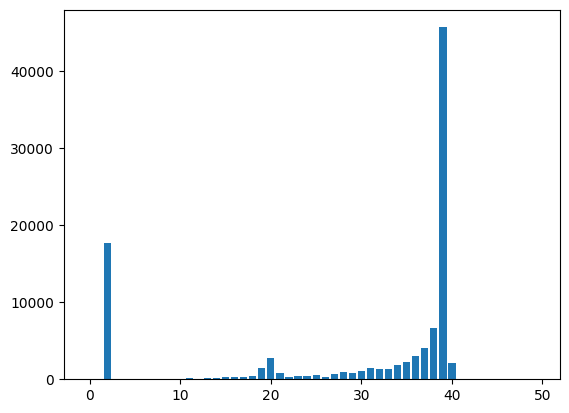

In [18]:
import matplotlib.pyplot as plt
plt.bar(range(len(h)), h)
plt.show()

In [19]:
#we want to know which positions have something wrong
import collections
low_quality = []
for quality in qualities:
    for idx, q in enumerate(quality):
        if phred33ToQ(q) == 2:
            low_quality.append(idx)
            break

collections.Counter(low_quality)



Counter({66: 629,
         65: 99,
         60: 36,
         64: 28,
         55: 22,
         50: 15,
         52: 10,
         59: 9,
         54: 8,
         62: 8,
         85: 7,
         49: 5,
         44: 5,
         90: 5,
         74: 4,
         63: 4,
         58: 4,
         80: 4,
         39: 4,
         45: 4,
         70: 4,
         75: 4,
         56: 4,
         57: 3,
         69: 3,
         35: 3,
         53: 3,
         40: 3,
         47: 3,
         84: 3,
         46: 2,
         68: 2,
         73: 2,
         78: 2,
         89: 2,
         61: 2,
         88: 2,
         94: 2,
         95: 2,
         77: 1,
         81: 1,
         92: 1,
         43: 1,
         67: 1,
         33: 1,
         98: 1,
         34: 1,
         48: 1,
         91: 1,
         51: 1,
         86: 1,
         97: 1,
         82: 1,
         38: 1})

Q7 ans -> 66